In [1]:
path="./ch02/usagov_bitly_data2012-03-16-1331923249.txt"

In [2]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [3]:
import json

In [4]:
records=[json.loads(line) for line in open(path).readlines()]
print records[0]

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11', u'c': u'US', u'nk': 1, u'tz': u'America/New_York', u'gr': u'MA', u'g': u'A6qOVH', u'h': u'wfLQtf', u'cy': u'Danvers', u'l': u'orofrog', u'al': u'en-US,en;q=0.8', u'hh': u'1.usa.gov', u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf', u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991', u't': 1331923247, u'hc': 1331822918, u'll': [42.576698, -70.954903]}


In [5]:
records[0]['tz']

u'America/New_York'

In [6]:
time_zones=[rec['tz'] for rec in records if 'tz' in rec]
print time_zones[0]

America/New_York


In [7]:
time_zones[1:10]

[u'America/Denver',
 u'America/New_York',
 u'America/Sao_Paulo',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Warsaw',
 u'',
 u'',
 u'']

In [8]:
def get_count(sequence):
    dic={}
    for tz in sequence:
        if tz not in dic:
            dic[tz]=1
        else:
            dic[tz]+=1
    return dic
                

In [9]:
counts=get_count(time_zones)

In [10]:
counts['']

521

In [11]:
len(time_zones)

3440

In [12]:
def top_counts(count_dict,n=10):
    value_key_pairs=[(count,tz) for tz,count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [13]:
top_counts(counts)

[(33, u'America/Sao_Paulo'),
 (35, u'Europe/Madrid'),
 (36, u'Pacific/Honolulu'),
 (37, u'Asia/Tokyo'),
 (74, u'Europe/London'),
 (191, u'America/Denver'),
 (382, u'America/Los_Angeles'),
 (400, u'America/Chicago'),
 (521, u''),
 (1251, u'America/New_York')]

In [14]:
from collections import Counter
counts=Counter(time_zones)
counts.most_common(10)

[(u'America/New_York', 1251),
 (u'', 521),
 (u'America/Chicago', 400),
 (u'America/Los_Angeles', 382),
 (u'America/Denver', 191),
 (u'Europe/London', 74),
 (u'Asia/Tokyo', 37),
 (u'Pacific/Honolulu', 36),
 (u'Europe/Madrid', 35),
 (u'America/Sao_Paulo', 33)]

In [15]:
from pandas import DataFrame,Series

In [16]:
import pandas as pd;import numpy as np

In [17]:
frame=DataFrame(records)

In [18]:
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1308262393,j.mp,NaN,bitly,"[40.218102, -111.613297]",0,http://www.AwareMap.com/,1331923249,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1331919941,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1,http://t.co/03elZC4Q,1331923250,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1331923068,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0,direct,1331923249,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1273672411,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0,http://www.shrewsbury-ma.gov/selco/,1331923251,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1273672506,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0,http://www.shrewsbury-ma.gov/selco/,1331923252,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0,http://plus.url.google.com/url?sa=z&n=13319232...,1331923255,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,NaN,0,http://www.facebook.com/,1331923255,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,NaN,0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1331923254,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1331923068,1.usa.gov,NaN,alelex88,NaN,0,http://t.co/o1Pd0WeV,1331923255,,http://apod.nasa.gov/apod/ap120312.html


In [19]:
frame['tz']

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
5          America/New_York
6             Europe/Warsaw
7                          
8                          
9                          
10      America/Los_Angeles
11         America/New_York
12         America/New_York
13                      NaN
14         America/New_York
15           Asia/Hong_Kong
16           Asia/Hong_Kong
17         America/New_York
18           America/Denver
19              Europe/Rome
20             Africa/Ceuta
21         America/New_York
22         America/New_York
23         America/New_York
24            Europe/Madrid
25        Asia/Kuala_Lumpur
26             Asia/Nicosia
27        America/Sao_Paulo
28                         
29                         
               ...         
3530    America/Los_Angeles
3531                       
3532       America/New_York
3533       America/New_York
3534        America/

In [20]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [21]:
frame['tz'].value_counts()[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [22]:
clean_tz=frame['tz'].fillna('Missing')

In [23]:
clean_tz[clean_tz=='']="Unknown"

In [24]:
count_tz=clean_tz.value_counts()

In [25]:
count_tz[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

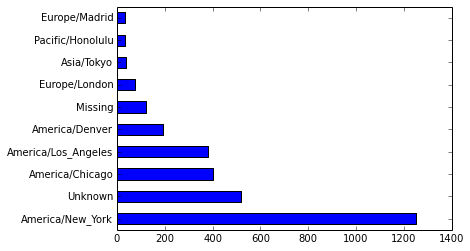

In [26]:
%matplotlib inline
count_tz[:10].plot(kind='barh',rot=0)

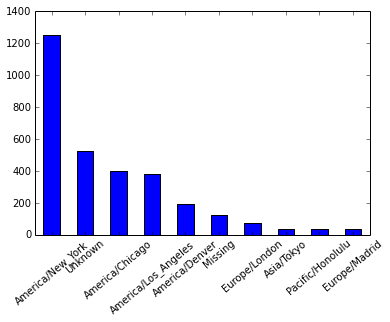

In [27]:
count_tz[:10].plot(kind='bar',rot=40)

In [28]:
frame['a'][51]

u'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

In [29]:
results=Series([x.split(' ')[0] for x in frame.a.dropna()])

In [30]:
results[:10]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
5               Mozilla/5.0
6               Mozilla/5.0
7               Mozilla/5.0
8                Opera/9.80
9               Mozilla/5.0
dtype: object

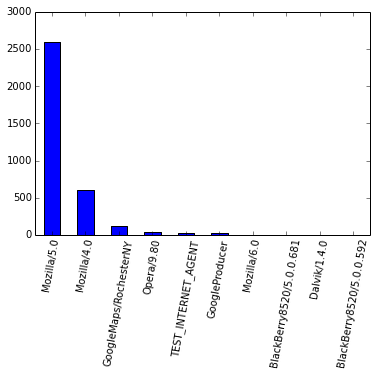

In [31]:
results.value_counts()[:10].plot(kind='bar',rot=80)

In [32]:
cframe=frame[frame.a.notnull()]

In [33]:
operating_system=np.where(cframe['a'].str.contains('Windows'),'Windows','Not Windows')

In [34]:
operating_system[:10]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows',
       'Windows', 'Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='|S11')

In [35]:
cframe['a'].str.contains('Windows')

0        True
1       False
2        True
3       False
4        True
5        True
6        True
7        True
8       False
9        True
10       True
11      False
12       True
14       True
15       True
16       True
17      False
18      False
19       True
20       True
21      False
22       True
23      False
24       True
25       True
26       True
27      False
28      False
29      False
30       True
        ...  
3529     True
3530     True
3531    False
3532     True
3533    False
3534    False
3535     True
3536    False
3537     True
3538    False
3539    False
3540     True
3541    False
3542     True
3544     True
3545     True
3546    False
3547    False
3548    False
3549     True
3550     True
3551     True
3552     True
3553     True
3554     True
3555     True
3556     True
3557    False
3558    False
3559     True
Name: a, dtype: bool

In [36]:
by_tz_os=cframe.groupby(['tz',operating_system])

In [37]:
agg_counts=by_tz_os.size().unstack().fillna(0)

In [38]:
agg_counts[:10]

,Not Windows,Windows
tz,,
,245,276
Africa/Cairo,0,3
Africa/Casablanca,0,1
Africa/Ceuta,0,2
Africa/Johannesburg,0,1
Africa/Lusaka,0,1
America/Anchorage,4,1
America/Argentina/Buenos_Aires,1,0
America/Argentina/Cordoba,0,1


In [39]:
agg_counts.sum(1).argsort()

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
America/Bogota                    62
America/Caracas                   34
America/Chicago                   60
America/Chihuahua                 36
America/Costa_Rica                37
America/Denver                    27
America/Edmonton                  76
America/Guayaquil                 56
America/Halifax                   89
America/Indianapolis               2
America/La_Paz                     4
America/Lima                       5
America/Los_Angeles                7
America/Managua                    8
America/Mazatlan                   9
America/Mexico_City               86
America/Monterrey                 1

In [41]:
indexer=agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [42]:
count_subset=agg_counts.take(indexer)[-10:]

In [43]:
count_subset[-10:]

,Not Windows,Windows
tz,,
America/Sao_Paulo,13,20
Europe/Madrid,16,19
Pacific/Honolulu,0,36
Asia/Tokyo,2,35
Europe/London,43,31
America/Denver,132,59
America/Los_Angeles,130,252
America/Chicago,115,285
,245,276


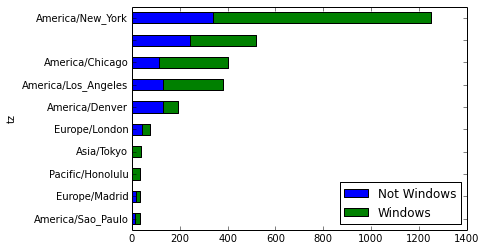

In [44]:
count_subset[-10:].plot(kind='barh',stacked=True)

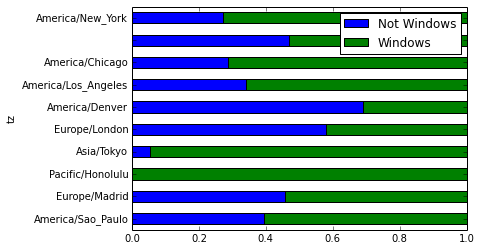

In [45]:
count_subset.div(count_subset.sum(1),axis=0).plot(kind='barh',stacked=True)

In [46]:
count_subset.div(count_subset.sum(1),axis=0)

,Not Windows,Windows
tz,,
America/Sao_Paulo,0.393939,0.606061
Europe/Madrid,0.457143,0.542857
Pacific/Honolulu,0.000000,1.000000
Asia/Tokyo,0.054054,0.945946
Europe/London,0.581081,0.418919
America/Denver,0.691099,0.308901
America/Los_Angeles,0.340314,0.659686
America/Chicago,0.287500,0.712500
,0.470250,0.529750


In [47]:
count_subset.sum(1)

tz
America/Sao_Paulo        33
Europe/Madrid            35
Pacific/Honolulu         36
Asia/Tokyo               37
Europe/London            74
America/Denver          191
America/Los_Angeles     382
America/Chicago         400
                        521
America/New_York       1251
dtype: float64